In [1]:
from google.colab import files
uploaded = files.upload()

Saving car details v4.csv to car details v4.csv


Cluster Means:
          price         year     kilometer       length        width  \
0  1.222948e+06  2016.357488  50684.544507  4178.266295  1738.409141   
1  5.818783e+06  2018.589916  34049.539356  4597.388308  1896.485064   
2  1.591398e+06  2016.433704  87172.088646  4628.408068  1831.468020   

        height  seating capacity  fuel tank capacity  
0  1544.051244          5.000000           48.175706  
1  1696.889769          5.470617           67.670950  
2  1806.721626          7.062103           64.778471  


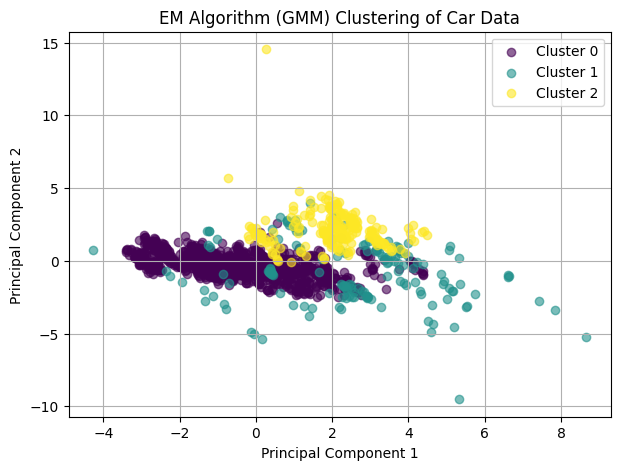


Model Converged: True
Log-Likelihood: -2.178619398436195


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib import cm

data = pd.read_csv("car details v4.csv")
data.columns = data.columns.str.strip().str.lower()

numeric_cols = ['price', 'year', 'kilometer', 'length', 'width', 'height',
                'seating capacity', 'fuel tank capacity']
X = data[numeric_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 3
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

labels = gmm.predict(X_scaled)

X['Cluster'] = labels

print("Cluster Means:")
print(pd.DataFrame(scaler.inverse_transform(gmm.means_), columns=numeric_cols))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
colors = cm.viridis(np.linspace(0, 1, n_components))

plt.figure(figsize=(7,5))
for i, color in enumerate(colors):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f"Cluster {i}", alpha=0.6, color=color)
plt.title("EM Algorithm (GMM) Clustering of Car Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

print("\nModel Converged:", gmm.converged_)
print("Log-Likelihood:", gmm.lower_bound_)
